In [516]:
#Downloads course enrollment numbers from web to plot how student-hours are distributed.
#This notebook plots a pie chart of student-hours per instructor 
#from data here. https://htmlaccess.louisville.edu/classSchedule/setupSearchClassSchedule.cfm
import numpy as np
from pandas import Series,DataFrame
import pandas as pd


In [517]:
#This filename will be used on the pie chart
filename='Spring 2016' 


In [518]:
#Download the latest course enrollment numbers
import urllib
import urllib2
import lxml
from bs4 import BeautifulSoup


#Download all a department's courses for a particular semester in HTML,
#It would be nicer to make this a function that could be called with a semester and dept, and
#save that label in a string for labeling the plot

url = 'https://htmlaccess.louisville.edu/classSchedule/searchClassSchedule.cfm'
#4162 is spring 2016
#4108 Fall 2010
#4112 Spring 2011
#4115 Summer 2011
#4118 Fall 2011
#4122 Spring 2012  
#4125 Summer 2012
#4128 Fall 2012
#4132 Spring 2013
#4135 Summer 2013
#4138 Fall 2013
#4142 Spring 2014
#4145 Summer 2014
#4148 Fall 2014
#4152 Spring 2015
#4155 Summer 2015
#4158 Fall 2015
values = {'term' : '4162',
          'subject' : 'ECE',  #ECE ME BE CEE CECS IE CHE PHYS ENGR
          'catalognbr' : '',
          'genEdCat' : 'none',
          'comBaseCat' : 'none',
          'starttimedir' : '0',
          'starttimehour' : '08',
          'starttimeminute':'00',
          'endtimedir' : '0',
          'endtimehour' : '22',
          'endtimeminute' :'00',
          'location' : 'any',
          'classstatus' : '0'}

data = urllib.urlencode(values)
req = urllib2.Request(url, data)
response = urllib2.urlopen(req)
the_page = response.read() # ought to catch exceptions!
soup=BeautifulSoup(the_page)
table=soup.find_all('table')[1]#there's a bogus table and then a real one
data = []

for row in table.findAll('tr'):
    if (len(row.find_parents("table")))<2: #if it's not a nested table like we have for day/time
        headings = row.findAll('th')
        heads=[ele.text.encode('utf-8').strip() for ele in headings]
        if heads !=[]:
            collabels=heads
        cells = row.findAll('td')
        cols = [ele.text.encode('utf-8').strip() for ele in cells if (len(ele.find_parents("table")))<2]
        #Don't append td if from a nested table -more about how http://stackoverflow.com/questions/28058203/beautifulsoup-ignore-nested-tables-inside-table
        data.append(cols)

dframe = pd.DataFrame(data)
nuheads=collabels[0:6]+collabels[8:len(collabels)] #Remove 2 extra headings
nuheads

['ClassNbr',
 'Subj',
 'CatNbr',
 'Sec',
 'Title',
 'Days',
 'Enroll',
 'Wait',
 'Instr',
 'Units',
 'Location']

In [519]:
dframe #what did you find

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2403,ECE,210,01,LOGIC DESIGN \r\n\nNote: This section has been...,MWF \r\n \n\r\n 11:00am-11:50am \r\n ...,65 of 65,0 of 5,"Welch, K",3.00,BELKNAP,None,None
2,2404,ECE,211,01,LOGIC DESIGN LABORATORY,W \r\n \n\r\n 03:00pm-05:30pm \r\n \n...,16 of 16,1 of 5,"Welch, K",1.00,BELKNAP,None,None
3,7614,ECE,211,02,LOGIC DESIGN LABORATORY,M \r\n \n\r\n 03:00pm-05:30pm \r\n \n...,16 of 16,2 of 5,"Welch, K",1.00,BELKNAP,None,None
4,8602,ECE,211,03,LOGIC DESIGN LABORATORY \r\n\nNote: This secti...,F \r\n \n\r\n 03:00pm-05:30pm \r\n \n...,16 of 16,4 of 5,"Welch, K",1.00,BELKNAP,None,None
5,8603,ECE,211,04,LOGIC DESIGN LABORATORY \r\n\nNote: This secti...,T \r\n \n\r\n 03:00pm-05:30pm \r\n \n...,16 of 16,2 of 5,"Welch, K",1.00,BELKNAP,None,None
6,2405,ECE,220,01,NETWORK ANALYSIS I \r\n\nNote: This section is...,MWF \r\n \n\r\n 09:00am-09:50am \r\n ...,13 of 35,0 of 5,"Welch, K",3.00,BELKNAP,None,None
7,2406,ECE,221,01,NETWORK ANALYSIS I LAB \r\n\nNote: This sectio...,Th \r\n \n\r\n 02:30pm-05:00pm \r\n \...,1 of 16,0 of 5,"Welch, K",1.00,BELKNAP,None,None
8,7615,ECE,221,02,NETWORK ANALYSIS I LAB,T \r\n \n\r\n 02:30pm-05:00pm \r\n \n...,12 of 15,0 of 3,"Welch, K",1.00,BELKNAP,None,None
9,2407,ECE,252,01,INTRO ELECTRICAL ENGN,MWF \r\n \n\r\n 10:00am-10:50am \r\n ...,40 of 40,5 of 5,"Cleaver, T",3.00,BELKNAP,None,None


In [520]:
dframe.columns
garbageheads=len(dframe.columns)-len(nuheads)
garbageheads

2

In [521]:
colheads=nuheads
for j in range(0,garbageheads):  #removing cols from nested table made bogus cols on the right, create fake names for those
  colheads += ['junk%d' % j]
dframe.columns=colheads

#Now make a data frame with only the cols I care about 
mydata=DataFrame(dframe,columns=['Instr','CatNbr','Sec','Enroll','Units'])

#Now get rid of any rows having a NaN or None
mydata=mydata.dropna()

enrollstrings=mydata.Enroll.tolist()#Enroll needs to be a string. some years there is an int that messes it up
mydata.Enroll = enrollstrings
mydata

,Instr,CatNbr,Sec,Enroll,Units
1,"Welch, K",210,01,65 of 65,3.00
2,"Welch, K",211,01,16 of 16,1.00
3,"Welch, K",211,02,16 of 16,1.00
4,"Welch, K",211,03,16 of 16,1.00
5,"Welch, K",211,04,16 of 16,1.00
6,"Welch, K",220,01,13 of 35,3.00
7,"Welch, K",221,01,1 of 16,1.00
8,"Welch, K",221,02,12 of 15,1.00
9,"Cleaver, T",252,01,40 of 40,3.00
10,"Cleaver, T",252,02,40 of 40,3.00


In [522]:
last=mydata.Instr.str.split(',',1).tolist()

In [523]:
last[3][0]#this will get the last name of the 4th row

'Welch'

In [524]:
numstu=mydata.Enroll.str.split(' ',1).tolist()

In [525]:
numstu

[['65', 'of 65'],
 ['16', 'of 16'],
 ['16', 'of 16'],
 ['16', 'of 16'],
 ['16', 'of 16'],
 ['13', 'of 35'],
 ['1', 'of 16'],
 ['12', 'of 15'],
 ['40', 'of 40'],
 ['40', 'of 40'],
 ['12', 'of 50'],
 ['25', 'of 50'],
 ['6', 'of 50'],
 ['52', 'of 70'],
 ['38', 'of 40'],
 ['48', 'of 48'],
 ['0', 'of 50'],
 ['11', 'of 25'],
 ['25', 'of 25'],
 ['4', 'of 25'],
 ['0', 'of 0'],
 ['TBA'],
 ['19', 'of 25'],
 ['18', 'of 25'],
 ['6', 'of 25'],
 ['8', 'of 25'],
 ['5', 'of 25'],
 ['5', 'of 25'],
 ['1', 'of 25'],
 ['6', 'of 25'],
 ['0', 'of 0'],
 ['19', 'of 25'],
 ['19', 'of 25'],
 ['15', 'of 30'],
 ['1', 'of 30'],
 ['1', 'of 15'],
 ['0', 'of 25'],
 ['0', 'of 0'],
 ['0', 'of 25'],
 ['TBA'],
 ['2', 'of 25'],
 ['2', 'of 25'],
 ['0', 'of 25'],
 ['4', 'of 25'],
 ['4', 'of 8'],
 ['TBA'],
 ['1', 'of 25'],
 ['0', 'of 25'],
 ['6', 'of 25'],
 ['3', 'of 25'],
 ['0', 'of 25'],
 ['0', 'of 0'],
 ['0', 'of 25'],
 ['0', 'of 0'],
 ['0', 'of 25'],
 ['0', 'of 0'],
 ['0', 'of 25'],
 ['0', 'of 25'],
 ['0', 'of 25'],
 ['0

In [526]:
numstu[21][0]

'TBA'

In [527]:
def grabint (item):
    try:
        return int(float(item [0]))
    except ValueError: #it is probably OTHER or TBA or some string like that
        return 0
    
numstuint=[grabint(item) for item in numstu] #Change numstu to be the number of enrolled students
        #by keeping only the first value. Or if it's a TBA or nan, shove a 0 there


In [528]:
numunits=mydata.Units.tolist()
numunitsint = [ grabint(item) for item in numunits]#keep only 1st digit, fails if a course has >9 units

In [529]:
sthrs=[a*b for a,b in zip(numstuint,numunitsint)]

In [530]:
lastlist=[item[0] for item in last]

In [531]:
mydata.Instr=lastlist #replace instructor string with my last-name list. Still has some TBA junk
#but the TBAs have 0 students and those will get removed later.
mydata.Units=numunitsint #change units to int, by replacing it with my list
mydata.Enroll=numstuint #and change the enrollment string by replacing it with my list
mydata['Sthrs']=sthrs#this worked to add a new Sthrs (student-hours) column
mydata

,Instr,CatNbr,Sec,Enroll,Units,Sthrs
1,Welch,210,01,65,3,195
2,Welch,211,01,16,1,16
3,Welch,211,02,16,1,16
4,Welch,211,03,16,1,16
5,Welch,211,04,16,1,16
6,Welch,220,01,13,3,39
7,Welch,221,01,1,1,1
8,Welch,221,02,12,1,12
9,Cleaver,252,01,40,3,120
10,Cleaver,252,02,40,3,120


In [532]:
#Find all distinct instructor names in Instr!
people=pd.unique(mydata.Instr.ravel())
people

array(['Welch', 'Cleaver', 'Gray', 'Harnett', 'Amini', 'Cohn', 'Faul',
       'McIntyre', 'Naber', '0 of 0', 'Zurada', 'Inanc', 'Farag',
       "O'Connell", 'Walsh', 'Li', 'TBA', 'Gerstle', 'Lilly', 'McNamara',
       'Beyerle'], dtype=object)

In [533]:
#Then add student-hours across all courses and sections taught by that instructor.
#http://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

In [534]:
profname=[]
profhrs=[]#array for the prof-hours data--probably more efficient to make a list?
profpct=[]
proflabel=[]
#I know it should be the same length as the people list
depthrs=sum(mydata.Sthrs)#for computing percentages
depthrs

1463

In [535]:
#Then get the data into a chart. Who's bringing in the tuition 


In [536]:
for person in people:
    #personframe=individual professor's course load
    personframe=mydata.loc[mydata.Instr==person]
    personshrs=personframe.Sthrs.sum()
    personspct=float(personshrs)/float(depthrs)*100
    personslabel=person + ' ' + '%.1f' % personspct +'%' #label for pie chart showing percent
    if personshrs > 0:
        profhrs.append(personshrs)
        profname.append(person)
        profpct.append(personspct)
        proflabel.append(personslabel)


In [537]:
proflabel

['Welch 21.3%',
 'Cleaver 16.4%',
 'Gray 4.2%',
 'Harnett 20.5%',
 'Amini 7.8%',
 'Cohn 2.7%',
 'Faul 10.3%',
 'McIntyre 2.1%',
 'Naber 5.2%',
 'Zurada 2.5%',
 'Inanc 1.4%',
 'Farag 0.7%',
 'Walsh 3.1%',
 'Li 0.3%',
 'McNamara 1.1%',
 'Beyerle 0.6%']

In [538]:
#now sort by student-hours so all the big wedges are together
sortlabel=[sortpct for sortlabel, sortpct in sorted(zip(profpct,proflabel), reverse=True)]
sortpct=sorted(profpct,reverse=True)
sortlabel
sortpct

[21.257689678742313,
 20.50580997949419,
 16.404647983595353,
 10.252904989747096,
 7.792207792207792,
 5.194805194805195,
 4.237867395762133,
 3.0758714969241283,
 2.734107997265892,
 2.460697197539303,
 2.050580997949419,
 1.367053998632946,
 1.0936431989063569,
 0.683526999316473,
 0.6151742993848257,
 0.2734107997265892]

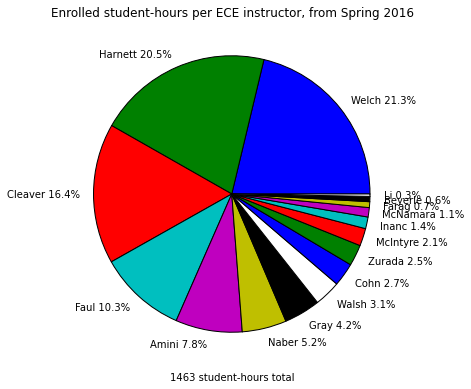

In [539]:
%matplotlib inline
import matplotlib.pyplot as plt
#getting this from here http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%203%20-%20Plotting%20with%20Matplotlib.ipynb
plt.figure(1,figsize=(6,6))
ax=plt.axes([0.1, 0.1, 0.8, 0.8])
plt.pie(sortpct,labels=sortlabel)
plt.title('Enrolled student-hours per ECE instructor, from %s'% filename)
plt.xlabel('%s student-hours total'% depthrs)